In [ ]:
!pip install yfinance

In [ ]:
!pip install pandas

In [ ]:
!pip install matplotlib

In [ ]:
!pip install seaborn

## Set up and basic information

In [49]:
# Dependencies
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn
import numpy as np

# Display all data frame rows
pd.set_option('display.max_rows', None)
# Prevent view/copy warning
pd.options.mode.chained_assignment = None  # default='warn'

gme = yf.Ticker("GME")

# Get stock info (info -> very big, check for potentially important data)
gme_info = gme.info

# Lists of data to print
gme_title_list = ["shortName","symbol","city","state","country","website","phone","sector","industry","fullTimeEmployees","exchangeTimezoneName","exchange","quoteType","longBusinessSummary"]
gme_info_print = ["Name","Symbol","City","State","Country","Website","Phone","Sector","Industry","Number of Employees","Time Zone","Stock Exchange","Quote Type","Summary"]

print("$GME STOCK INFO")
print("--------------")

for i in range(len(gme_title_list)):
    print(gme_info_print[i] + ": " + str(gme_info[gme_title_list[i]]) + '\n')

$GME STOCK INFO
--------------
Name: GameStop Corporation

Symbol: GME

City: Grapevine

State: TX

Country: United States

Website: http://www.gamestop.com

Phone: 817 424 2000

Sector: Consumer Cyclical

Industry: Specialty Retail

Number of Employees: 14000

Time Zone: America/New_York

Stock Exchange: NYQ

Quote Type: EQUITY

Summary: GameStop Corp. operates as a multichannel video game, consumer electronics, and collectibles retailer in the United States, Canada, Australia, and Europe. The company sells new and pre-owned video game platforms; accessories, including controllers, gaming headsets, virtual reality products, and memory cards; new and pre-owned video game software; and in-game digital currency, digital downloadable content, and full-game downloads, as well as network points cards, and prepaid digital and prepaid subscription cards. It also sells collectibles comprising licensed merchandise primarily related to the video game, television, and movie industries, as well as

# GME 

## Stock Stats 

In [50]:
# Get historical market data
hist = gme.history(period="1mo")
clean_hist = hist.drop(['Dividends', 'Stock Splits'], axis=1)

clean_hist["Daily Change"] = clean_hist['Close'] - clean_hist['Open']

clean_hist["High Low Difference"] = clean_hist['High'] - clean_hist['Low']

clean_hist["After Market Change"] = 0.0
for i in range(len(clean_hist)-1):
    clean_hist["After Market Change"][i+1] = clean_hist["Open"][i+1] - clean_hist["Close"][i]
    
clean_hist

,Open,High,Low,Close,Volume,Daily Change,High Low Difference,After Market Change
Date,,,,,,,,
2021-01-05,17.350000,18.080000,17.230000,17.370001,4961500,0.020000,0.850000,0.000000
2021-01-06,17.340000,18.980000,17.330000,18.360001,6056200,1.020000,1.650000,-0.030001
2021-01-07,18.469999,19.450001,18.020000,18.080000,6129300,-0.389999,1.430000,0.109999
2021-01-08,18.180000,18.299999,17.080000,17.690001,6464500,-0.490000,1.219999,0.100000
2021-01-11,19.410000,20.650000,19.010000,19.940001,14927600,0.530001,1.639999,1.719999
2021-01-12,19.959999,20.400000,19.320000,19.950001,7060700,-0.009998,1.080000,0.019999
2021-01-13,20.420000,38.650002,20.030001,31.400000,144501700,10.980000,18.620001,0.469999
2021-01-14,38.090000,43.060001,33.049999,39.910000,93717400,1.820000,10.010002,6.690001
2021-01-15,38.490002,40.750000,34.009998,35.500000,46752200,-2.990002,6.740002,-1.419998


In [51]:
# Get stats
clean_hist.describe().round(1)

,Open,High,Low,Close,Volume,Daily Change,High Low Difference,After Market Change
count,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0
mean,100.6,123.5,69.3,88.9,66798946.0,-11.7,54.2,13.3
std,117.0,143.1,73.2,98.3,59332343.9,32.7,85.8,65.2
min,17.3,18.1,17.1,17.4,4961500.0,-91.6,0.9,-84.2
25%,20.1,25.2,19.5,22.8,19563650.0,-19.9,2.5,-1.0
50%,40.4,45.1,36.8,41.5,53669500.0,-0.4,14.3,0.1
75%,108.2,156.0,78.7,91.8,89593300.0,1.6,80.3,6.5
max,379.7,483.0,250.0,347.5,196784300.0,59.4,370.8,206.8


## Graphs

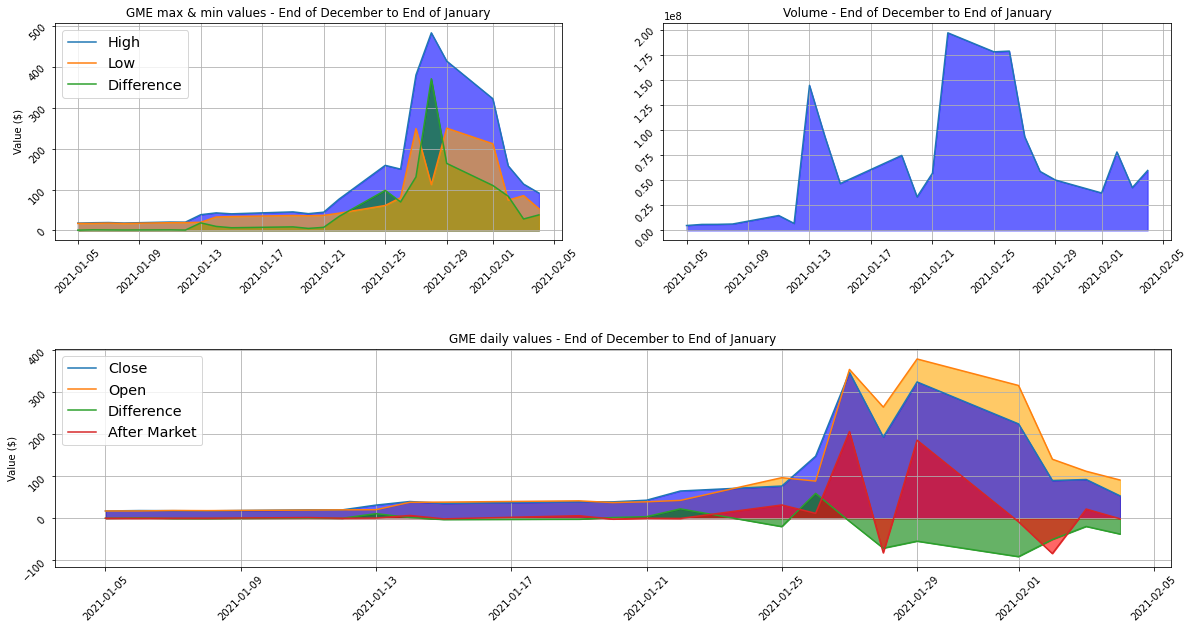

In [52]:
fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(2,2)
gs.update(wspace=0.2, hspace=0.5)

ax1=fig.add_subplot(gs[0,0])
ax2=fig.add_subplot(gs[0,1])
ax3=fig.add_subplot(gs[1,:])

ax1.plot(clean_hist["High"],label="High")
ax1.plot(clean_hist["Low"],label="Low")
ax1.plot(clean_hist["High Low Difference"],label="Difference")
ax1.fill_between(clean_hist.index.tolist(),clean_hist["High"],0,color="blue",alpha=0.6)
ax1.fill_between(clean_hist.index.tolist(),clean_hist["High Low Difference"],0,color="green",alpha=0.6)
ax1.fill_between(clean_hist.index.tolist(),clean_hist["Low"],0,color="orange",alpha=0.6)

ax1.set_title("GME max & min values - End of December to End of January")
ax1.set(ylabel="Value ($)")
ax1.grid()
ax1.legend(fontsize='x-large')
ax1.tick_params(labelrotation=45)

ax2.plot(clean_hist["Volume"])
ax2.fill_between(clean_hist.index.tolist(),clean_hist["Volume"],0,color="blue",alpha=0.6)
ax2.grid()
ax2.set_title("Volume - End of December to End of January")
ax2.tick_params(labelrotation=45)

ax3.plot(clean_hist["Close"],label="Close")
ax3.plot(clean_hist["Open"],label="Open")
ax3.plot(clean_hist["Daily Change"],label="Difference")
ax3.plot(clean_hist["After Market Change"],label="After Market")
ax3.fill_between(clean_hist.index.tolist(),clean_hist["Open"],0,color="orange",alpha=0.6)
ax3.fill_between(clean_hist.index.tolist(),clean_hist["Close"],0,color="blue",alpha=0.6)
ax3.fill_between(clean_hist.index.tolist(),clean_hist["Daily Change"],0,color="green",alpha=0.6)
ax3.fill_between(clean_hist.index.tolist(),clean_hist["After Market Change"],0,color="red",alpha=0.6)

ax3.grid()
ax3.set_title("GME daily values - End of December to End of January")
ax3.set(ylabel="Value ($)")
ax3.legend(fontsize='x-large')
ax3.tick_params(labelrotation=45)

In [53]:
# Get major holders
major_holder_df = gme.major_holders
major_holder_df

,0,1
0,27.33%,% of Shares Held by All Insider
1,122.04%,% of Shares Held by Institutions
2,167.96%,% of Float Held by Institutions
3,286,Number of Institutions Holding Shares


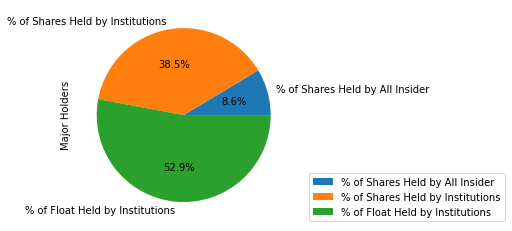

In [54]:
# Formatting
majorclean_df = major_holder_df.drop(3,axis=0)
majorclean_df = majorclean_df.rename(columns={0:'Major Holders'},index={0:majorclean_df[1][0],1:majorclean_df[1][1],2:majorclean_df[1][2]})
majorclean_df = majorclean_df.drop(1,axis=1)

# Drop % symbol but keep the rest of the str, then change dtype to float for plotting
majorclean_df['Major Holders'] = majorclean_df['Major Holders'].str.replace(r'%$','').astype('float')

# Pie plot (manually placing the legend)
majorclean_df.plot.pie(y='Major Holders',autopct='%1.1f%%').legend(loc='lower right',bbox_to_anchor=(2.0, -0.01))
plt.show()

In [58]:
# Get institutions
institutions = gme.institutional_holders
institutions["Average share price"] = institutions["Value"]/institutions["Shares"]

institutions

,Holder,Shares,Date Reported,% Out,Value,Average share price
0,"FMR, LLC",9534090,2020-09-29,0.1367,97247718,10.20
1,Blackrock Inc.,8600507,2020-09-29,0.1233,87725171,10.20
2,"Vanguard Group, Inc. (The)",5288116,2020-09-29,0.0758,53938783,10.20
3,"Susquehanna International Group, LLP",4444128,2020-09-29,0.0637,45330105,10.20
4,Dimensional Fund Advisors LP,3948114,2020-09-29,0.0566,40270762,10.20
5,Senvest Management LLC,3225740,2020-09-29,0.0462,32902548,10.20
6,State Street Corporation,2609487,2020-09-29,0.0374,26616767,10.20
7,Morgan Stanley,1995842,2020-09-29,0.0286,20357588,10.20
8,"Paradice Investment Management, LLC",1832526,2020-09-29,0.0263,18691765,10.20
9,Norges Bank Investment Management,1811792,2019-12-30,0.0260,11015695,6.08


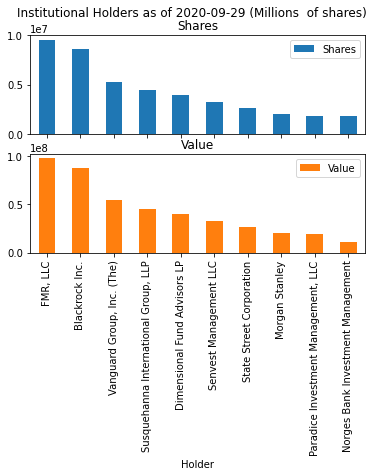

In [56]:
# Generate bar plot
institutions.plot.bar(x="Holder",y=["Shares","Value"],title="Institutional Holders as of 2020-09-29 (Millions  of shares)",subplots=True)
plt.show()

In [ ]:
# Get firm's recommendations
recom_df = gme.recommendations

# Cutoff date
cutoff = "2020"

# Get dates after cutoff
clean_recom_df = recom_df.loc[recom_df.index >= cutoff]
clean_recom_df

In [ ]:
gme.calendar

#### Next API ideas

In [ ]:
#gme.actions

# show dividends
#gme.dividends

# show splits
#gme.splits

# show financials
#gme.financials
#gme.quarterly_financials

# show major holders
#gme.major_holders

# show institutional holders
#gme.institutional_holders

# show balance sheet
#gme.balance_sheet
#gme.quarterly_balance_sheet

# show cashflow
#gme.cashflow
#gme.quarterly_cashflow

# show earnings
#gme.earnings
#gme.quarterly_earnings

# show sustainability
#gme.sustainability

# show analysts recommendations
#gme.recommendations

# show next event (earnings, etc)
#gme.calendar

# show ISIN code - *experimental*
# ISIN = International Securities Identification Number
#gme.isin

# show options expirations
#gme.options

In [ ]:
!pip install yahoo_fin

In [ ]:
!pip install requests_html

In [60]:
import yahoo_fin.stock_info as y_f

ticker = 'GME'
y_f.get_analysts_info(ticker)

{'Earnings Estimate':   Earnings Estimate  Current Qtr. (Jan 2021)  Next Qtr. (Apr 2021)  \
 0   No. of Analysts                     7.00                  6.00   
 1     Avg. Estimate                     1.42                 -0.45   
 2      Low Estimate                     0.84                 -0.72   
 3     High Estimate                     1.83                 -0.11   
 4      Year Ago EPS                     1.27                 -1.61   
 
    Current Year (2021)  Next Year (2022)  
 0                 7.00              7.00  
 1                -2.10             -0.17  
 2                -2.69             -2.10  
 3                -1.69              0.95  
 4                 0.22             -2.10  ,
 'Revenue Estimate':           Revenue Estimate Current Qtr. (Jan 2021) Next Qtr. (Apr 2021)  \
 0          No. of Analysts                       8                    7   
 1            Avg. Estimate                   2.29B                 1.2B   
 2             Low Estimate           

In [ ]:
y_f.get_balance_sheet(ticker)

In [ ]:
y_f.get_cash_flow(ticker)

In [ ]:
y_f.get_day_gainers()

In [ ]:
y_f.get_day_losers()

In [ ]:
y_f.get_day_most_active()

In [61]:
y_f.get_dividends(ticker, start_date = '2021', end_date = None, index_as_date = True)

KeyError: 'events'

In [44]:
y_f.get_earnings(ticker)

{'quarterly_results':      date  actual  estimate
 0  1Q2020    1.27      0.79
 1  2Q2020   -1.61     -1.27
 2  3Q2020   -1.40     -1.13
 3  4Q2020   -0.53     -0.85,
 'yearly_revenue_earnings':    date     revenue   earnings
 0  2017  7965000000  353200000
 1  2018  8547100000   34700000
 2  2019  8285300000 -673000000
 3  2020  6466000000 -470900000,
 'quarterly_revenue_earnings':      date     revenue   earnings
 0  1Q2020  2194100000   21000000
 1  2Q2020  1021000000 -165700000
 2  3Q2020   942000000 -111300000
 3  4Q2020  1004700000  -18800000}

In [45]:
y_f.get_financials(ticker)

{'yearly_income_statement': endDate                            2020-02-01   2019-02-02  2018-02-03  \
 Breakdown                                                                
 researchDevelopment                      None         None        None   
 effectOfAccountingCharges                None         None        None   
 incomeBeforeTax                    -426800000   -753100000   383900000   
 minorityInterest                         None         None        None   
 netIncome                          -470900000   -673000000    34700000   
 sellingGeneralAdministrative       1893600000   1997200000  2040700000   
 grossProfit                        1908700000   2308100000  2484900000   
 ebit                                 15100000    310900000   444200000   
 operatingIncome                      15100000    310900000   444200000   
 otherOperatingExpenses                   None         None        None   
 interestExpense                     -38500000    -56800000   -56800000  

In [48]:
holders = y_f.get_holders(ticker)
holders["Major Holders"]
holders["Top Institutional Holders"]

,Holder,Shares,Date Reported,% Out,Value
0,Fidelity Series Intrinsic Opportunities Fund,6801757,"Oct 30, 2020",9.75%,71214395
1,iShares Core S&P Smallcap ETF,3514708,"Dec 30, 2020",5.04%,66217098
2,Fidelity Low-Priced Stock Fund,2000679,"Oct 30, 2020",2.87%,20947109
3,Vanguard Total Stock Market Index Fund,1411570,"Sep 29, 2020",2.02%,14398014
4,iShares Russell 2000 ETF,1368843,"Dec 30, 2020",1.96%,25789002
5,DFA U.S. Small Cap Value Series,1121503,"Oct 30, 2020",1.61%,11742136
6,Vanguard Strategic Equity Fund,703551,"Sep 29, 2020",1.01%,7176220
7,Vanguard Extended Market Index Fund,654720,"Sep 29, 2020",0.94%,6678144
8,Vanguard Small-Cap Index Fund,602333,"Sep 29, 2020",0.86%,6143796
9,iShares Russell 2000 Value ETF,566835,"Dec 30, 2020",0.81%,10679171


In [63]:
y_f.get_income_statement(ticker, yearly = True)

endDate,2020-02-01,2019-02-02,2018-02-03,2017-01-28
Breakdown,,,,
researchDevelopment,None,None,None,None
effectOfAccountingCharges,None,None,None,None
incomeBeforeTax,-426800000,-753100000,383900000,428700000
minorityInterest,None,None,None,None
netIncome,-470900000,-673000000,34700000,353200000
sellingGeneralAdministrative,1893600000,1997200000,2040700000,1861900000
grossProfit,1908700000,2308100000,2484900000,2499900000
ebit,15100000,310900000,444200000,501300000
operatingIncome,15100000,310900000,444200000,501300000


In [62]:
y_f.get_live_price(ticker)

53.5

In [64]:
y_f.get_quote_table(ticker , dict_result = True)

{'1y Target Est': 13.44,
 '52 Week Range': '2.57 - 483.00',
 'Ask': '50.19 x 1000',
 'Avg. Volume': 29363446.0,
 'Beta (5Y Monthly)': -1.95,
 'Bid': '54.10 x 1400',
 "Day's Range": '53.33 - 91.50',
 'EPS (TTM)': -4.22,
 'Earnings Date': 'Mar 24, 2021 - Mar 29, 2021',
 'Ex-Dividend Date': 'Mar 14, 2019',
 'Forward Dividend & Yield': 'N/A (N/A)',
 'Market Cap': '3.731B',
 'Open': 91.19,
 'PE Ratio (TTM)': nan,
 'Previous Close': 92.41,
 'Quote Price': 53.5,
 'Volume': 59750411.0}

In [65]:
y_f.get_splits(ticker, start_date = None, end_date = None, index_as_date = True)

,splitRatio,ticker
2007-03-19,2:1,GME


In [66]:
y_f.get_stats(ticker)

,Attribute,Value
0,Beta (5Y Monthly),-1.95
1,52-Week Change 3,"2,132.13%"
2,S&P500 52-Week Change 3,14.48%
3,52 Week High 3,483.00
4,52 Week Low 3,2.57
5,50-Day Moving Average 3,64.20
6,200-Day Moving Average 3,22.61
7,Avg Vol (3 month) 3,29.36M
8,Avg Vol (10 day) 3,89.66M
9,Shares Outstanding 5,69.75M


In [67]:
y_f.get_stats_valuation(ticker)

,Unnamed: 0,As of Date: 2/4/2021Current,10/31/2020,7/31/2020,4/30/2020,1/31/2020
0,Market Cap (intraday) 5,6.45B,682.24M,259.68M,370.05M,253.14M
1,Enterprise Value 3,7.15B,1.11B,984.88M,1.06B,1.14B
2,Trailing P/E,NaN,NaN,NaN,NaN,NaN
3,Forward P/E 1,36.76,NaN,NaN,39.06,NaN
4,PEG Ratio (5 yr expected) 1,NaN,NaN,NaN,NaN,NaN
5,Price/Sales (ttm),1.17,0.13,0.05,0.08,0.05
6,Price/Book (mrq),19.40,1.94,0.60,0.61,0.41
7,Enterprise Value/Revenue 3,1.39,1.11,1.05,1.04,0.52
8,Enterprise Value/EBITDA 6,-78.45,-25.72,-15.15,-12.37,11.07


In [70]:
from yahoo_fin import options
options.get_calls('gme')

,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility
0,GME210205C00000500,2021-02-04 3:21PM EST,0.5,55.30,52.40,54.50,-36.20,-39.56%,180,114,0.00%
1,GME210205C00001000,2021-02-04 2:43PM EST,1.0,59.00,51.90,54.05,-33.35,-36.11%,123,34,"6,800.00%"
2,GME210205C00001500,2021-02-04 1:01PM EST,1.5,61.30,50.40,53.55,-37.70,-38.08%,3,2,"3,650.00%"
3,GME210205C00002000,2021-02-04 10:55AM EST,2.0,70.25,50.20,53.00,-27.80,-28.35%,2,5,"3,725.00%"
4,GME210205C00002500,2021-02-03 9:42AM EST,2.5,99.73,49.70,52.50,0.00,-,10,2,"3,409.38%"
5,GME210205C00003000,2021-02-04 11:49AM EST,3.0,61.10,49.20,52.00,-33.90,-35.68%,11,0,"3,162.50%"
6,GME210205C00003500,2021-02-04 12:06PM EST,3.5,61.05,48.85,51.50,-29.05,-32.24%,1,1,"3,121.88%"
7,GME210205C00004000,2021-02-02 9:34AM EST,4.0,130.40,48.20,51.00,0.00,-,52,1,"2,800.00%"
8,GME210205C00004500,2021-02-02 2:08PM EST,4.5,102.25,47.70,50.50,0.00,-,2,1,"2,656.25%"
9,GME210205C00005000,2021-02-04 11:27AM EST,5.0,60.00,47.20,50.00,-28.65,-32.32%,4,2,"2,531.25%"
